<h1><center>MAIN PROJECT</center></h1>

### **DOMAIN: Election,       DATASET: Portugal-Election-FinalMandates-**

## AIM: predict the final number of elected MPs in a district/national-level.

Dataset of the real-time election results of the 2019 Portuguese Parliamentary Election.

Dataset describing the evolution of results in the Portuguese Parliamentary Elections of October 6th 2019. The data spans a time interval of 4 hours and 25 minutes, in intervals of 5 minutes, concerning the results of the 21 parties involved in the electoral event.

The variables in the dataset used:-

1.TimeElapsed (Numeric): Time (minutes) passed since the first data acquisition 2.time (timestamp): Date and time of the data acquisition 3.territoryName (string): Short name of the location (district or nation-wide) 4.totalMandates (numeric): MP's elected at the moment 5.availableMandates (numeric): MP's left to elect at the moment 6.numParishes (numeric): Total number of parishes in this location 7.numParishesApproved (numeric): Number of parishes approved in this location 8.blankVotes (numeric): Number of blank votes 9.blankVotesPercentage (numeric): Percentage of blank votes 10.nullVotes (numeric): Number of null votes 11.nullVotesPercentage (numeric): Percentage of null votes 12.votersPercentage (numeric): Percentage of voters 13.subscribedVoters (numeric): Number of subscribed voters in the location 14.totalVoters (numeric): Percentage of blank votes 15.pre.blankVotes (numeric): Number of blank votes (previous election) 16.pre.blankVotesPercentage (numeric): Percentage of blank votes (previous election) 17.pre.nullVotes (numeric): Number of null votes (previous election) 18.pre.nullVotesPercentage (numeric): Percentage of null votes (previous election) 19.pre.votersPercentage (numeric): Percentage of voters (previous election) 2O.pre.subscribedVoters (numeric): Number of subscribed voters in the location (previous election) 21.pre.totalVoters (numeric): Percentage of blank votes (previous election) 22.Party (string): Political Party 23.Mandates (numeric): MP's elected at the moment for the party in a given district 24.Percentage (numeric): Percentage of votes in a party 25.validVotesPercentage (numeric): Percentage of valid votes in a party 26.Votes (numeric): Percentage of party votes 27.Hondt (numeric): Number of MP's according to the distribution of votes now 28.FinalMandates (numeric): Target: final number of elected MP's in a district/national-level


# **DATA COLLECTION**

In [ ]:
#Mount google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LogisticRegression,Lasso,LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn import metrics
from scipy.stats import zscore
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
import warnings 
warnings.filterwarnings('ignore')

In [ ]:
#Reading dataset from google drive

In [ ]:
data =pd.read_csv("drive/My Drive/ICTAK MAIN PROJECT/ElectionData.csv")

In [ ]:
#Displaying first five values usinh head()

In [ ]:
data.head()

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,...,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
0,0,06-10-2019 20:10,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546.0,PS,0,38.29,40.22,147993.0,94,106
1,0,06-10-2019 20:10,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546.0,PPD/PSD,0,33.28,34.95,128624.0,81,77
2,0,06-10-2019 20:10,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546.0,B.E.,0,6.81,7.15,26307.0,16,19
3,0,06-10-2019 20:10,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546.0,CDS-PP,0,4.90,5.14,18923.0,12,5
4,0,06-10-2019 20:10,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546.0,PCP-PEV,0,4.59,4.83,17757.0,11,12


In [ ]:
#Displaying last five values using tail()

In [ ]:
#Checking unique values in target column FinalMandates.
data['FinalMandates'].unique()

array([106,  77,  19,   5,  12,   4,   1,   0,   6,   7,   2,   8,   3,
        20,  17,  15,   9])

In [ ]:
data.tail()

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,...,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
21638,265,07-10-2019 00:35,Viseu,8,0,277,277,4995,2.81,3700,...,51.28,371931,190712.0,NC,0,0.19,0.20,332.0,0,0
21639,265,07-10-2019 00:35,Viseu,8,0,277,277,4995,2.81,3700,...,51.28,371931,190712.0,PNR,0,0.18,0.19,326.0,0,0
21640,265,07-10-2019 00:35,Viseu,8,0,277,277,4995,2.81,3700,...,51.28,371931,190712.0,MPT,0,0.14,0.15,256.0,0,0
21641,265,07-10-2019 00:35,Viseu,8,0,277,277,4995,2.81,3700,...,51.28,371931,190712.0,PTP,0,0.13,0.14,239.0,0,0
21642,265,07-10-2019 00:35,Viseu,8,0,277,277,4995,2.81,3700,...,51.28,371931,190712.0,JPP,0,0.07,0.07,118.0,0,0


In [ ]:
#Finding the shape of the dataset(number of rows and columns) using shape.

In [ ]:
data.shape

(21643, 28)

The dataset includes 21643 rows and 28 columns

In [ ]:
#Finding the column names of our dataset

In [ ]:
data.columns

Index(['TimeElapsed', 'time', 'territoryName', 'totalMandates',
       'availableMandates', 'numParishes', 'numParishesApproved', 'blankVotes',
       'blankVotesPercentage', 'nullVotes', 'nullVotesPercentage',
       'votersPercentage', 'subscribedVoters', 'totalVoters', 'pre.blankVotes',
       'pre.blankVotesPercentage', 'pre.nullVotes', 'pre.nullVotesPercentage',
       'pre.votersPercentage', 'pre.subscribedVoters', 'pre.totalVoters',
       'Party', 'Mandates', 'Percentage', 'validVotesPercentage', 'Votes',
       'Hondt', 'FinalMandates'],
      dtype='object')

In [ ]:
#Finding the datatypes of features in our dataset

In [ ]:
data.dtypes

TimeElapsed                   int64
time                         object
territoryName                object
totalMandates                 int64
availableMandates             int64
numParishes                   int64
numParishesApproved           int64
blankVotes                    int64
blankVotesPercentage        float64
nullVotes                     int64
nullVotesPercentage         float64
votersPercentage            float64
subscribedVoters              int64
totalVoters                   int64
pre.blankVotes                int64
pre.blankVotesPercentage    float64
pre.nullVotes                 int64
pre.nullVotesPercentage     float64
pre.votersPercentage        float64
pre.subscribedVoters          int64
pre.totalVoters             float64
Party                        object
Mandates                      int64
Percentage                  float64
validVotesPercentage        float64
Votes                       float64
Hondt                         int64
FinalMandates               

In [ ]:
#Finding the summery for our dataset using info()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21643 entries, 0 to 21642
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TimeElapsed               21643 non-null  int64  
 1   time                      21643 non-null  object 
 2   territoryName             21643 non-null  object 
 3   totalMandates             21643 non-null  int64  
 4   availableMandates         21643 non-null  int64  
 5   numParishes               21643 non-null  int64  
 6   numParishesApproved       21643 non-null  int64  
 7   blankVotes                21643 non-null  int64  
 8   blankVotesPercentage      21643 non-null  float64
 9   nullVotes                 21643 non-null  int64  
 10  nullVotesPercentage       21643 non-null  float64
 11  votersPercentage          21643 non-null  float64
 12  subscribedVoters          21643 non-null  int64  
 13  totalVoters               21643 non-null  int64  
 14  pre.bl

In [ ]:
#Finding statistical values for our dataset

In [ ]:
data.describe()

,TimeElapsed,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,...,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
count,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,...,21643.000000,21629.000000,2.164300e+04,2.162300e+04,21643.000000,21643.000000,21601.000000,2.163500e+04,21643.000000,21643.000000
mean,133.146052,11.544795,11.499284,309.956013,261.090237,8875.066673,2.621629,6148.068752,1.961471,51.983722,...,1.777442,54.549502,6.378503e+05,3.597780e+05,0.565495,4.968484,5.206180,1.585677e+04,1.126138,1.126138
std,77.651193,31.314567,31.738783,659.055911,583.377428,21484.874088,0.795289,14735.469269,0.375250,4.854380,...,0.388798,4.965391,1.544418e+06,8.767236e+05,4.421804,10.379967,10.878794,9.312292e+04,6.293552,6.872644
min,0.000000,0.000000,0.000000,54.000000,3.000000,19.000000,0.530000,39.000000,1.340000,35.980000,...,1.140000,40.870000,6.383000e+03,3.215000e+03,0.000000,0.020000,0.020000,1.000000e+00,0.000000,0.000000
25%,65.000000,1.000000,0.000000,75.000000,67.000000,1188.000000,2.230000,1094.000000,1.720000,50.290000,...,1.520000,51.210000,1.289260e+05,6.964400e+04,0.000000,0.220000,0.230000,2.355000e+02,0.000000,0.000000
50%,135.000000,4.000000,3.000000,147.000000,120.000000,2998.000000,2.640000,2232.000000,1.870000,53.130000,...,1.690000,56.260000,2.284970e+05,1.102730e+05,0.000000,0.620000,0.650000,7.900000e+02,0.000000,0.000000
75%,200.000000,9.000000,9.000000,242.000000,208.000000,6889.000000,2.980000,4121.000000,2.230000,54.550000,...,1.970000,58.220000,3.933140e+05,2.276200e+05,0.000000,3.010000,3.160000,4.510000e+03,0.000000,0.000000
max,265.000000,226.000000,226.000000,3092.000000,3092.000000,129599.000000,5.460000,88539.000000,3.350000,59.870000,...,3.120000,62.580000,9.439701e+06,5.380451e+06,106.000000,49.110000,51.420000,1.866407e+06,94.000000,106.000000


In [ ]:
#Finding the presance of null values in our dataset using isna().sum()

In [ ]:
data.isna().sum()

TimeElapsed                  0
time                         0
territoryName                0
totalMandates                0
availableMandates            0
numParishes                  0
numParishesApproved          0
blankVotes                   0
blankVotesPercentage         0
nullVotes                    0
nullVotesPercentage          0
votersPercentage             0
subscribedVoters             0
totalVoters                  0
pre.blankVotes               0
pre.blankVotesPercentage     0
pre.nullVotes                0
pre.nullVotesPercentage      0
pre.votersPercentage        14
pre.subscribedVoters         0
pre.totalVoters             20
Party                        0
Mandates                     0
Percentage                   0
validVotesPercentage        42
Votes                        8
Hondt                        0
FinalMandates                0
dtype: int64

This dataset contains some missing values: pre.votersPercentage (14), pre.totalVoters (20), validVotesPercentage(42) and Votes (8).

# **EXPLORATORY DATA ANALYSIS**

## 1.Univariate analysis

In [ ]:
# Numerical columns

In [ ]:
numerical_variables=[features for features in data.columns if data[features].dtypes!='O']
numerical_variables.remove('FinalMandates') #FinalMandates is our target column
numerical_variables

['TimeElapsed',
 'totalMandates',
 'availableMandates',
 'numParishes',
 'numParishesApproved',
 'blankVotes',
 'blankVotesPercentage',
 'nullVotes',
 'nullVotesPercentage',
 'votersPercentage',
 'subscribedVoters',
 'totalVoters',
 'pre.blankVotes',
 'pre.blankVotesPercentage',
 'pre.nullVotes',
 'pre.nullVotesPercentage',
 'pre.votersPercentage',
 'pre.subscribedVoters',
 'pre.totalVoters',
 'Mandates',
 'Percentage',
 'validVotesPercentage',
 'Votes',
 'Hondt']

1.1 COUNTPLOT

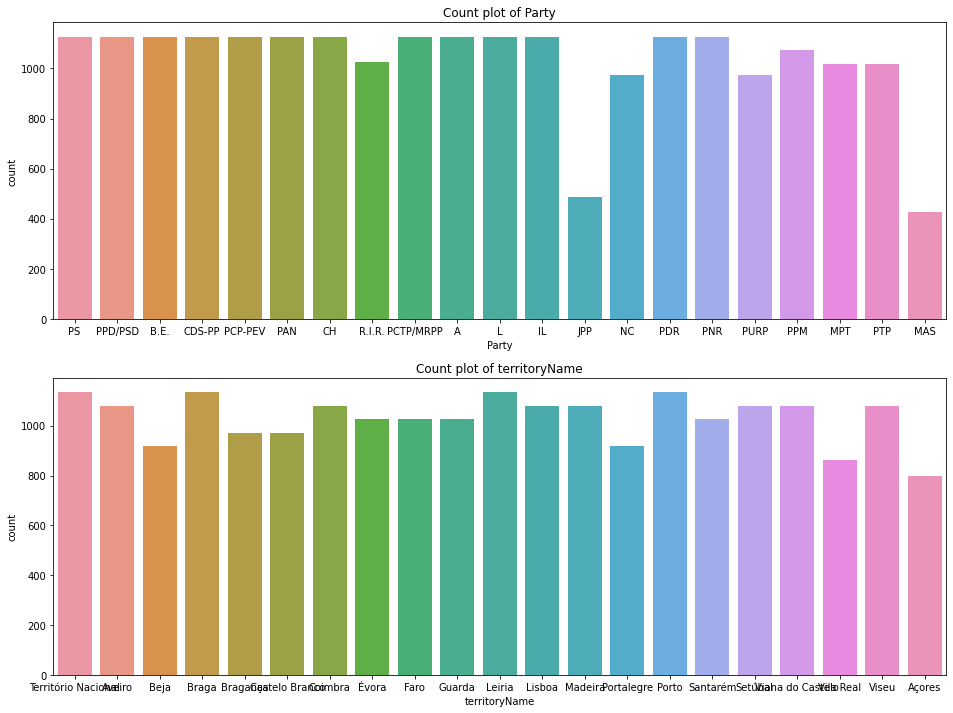

In [ ]:
cols = ["Party","territoryName"]
fig,axes=plt.subplots(nrows=2,ncols=1,figsize=[16,12])
for i in range(0,len(cols)):
    axes[i]=sns.countplot(x = cols[i],data = data,ax=axes[i])
    axes[i].set_title("Count plot of "+cols[i])



**Observation:
a. Parties with minimum count are JPP and MAS .
b. Most territories have count in the ranges of 800 to 1000 per territory (indicating equal distribution of voters in different territories)**



1.2 HISTOGRAM

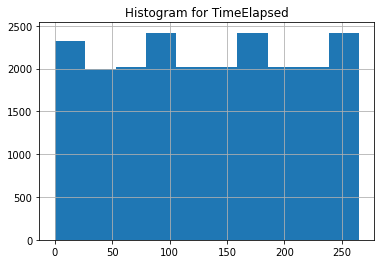

In [ ]:
plt.title('Histogram for TimeElapsed')
data['TimeElapsed'].hist()

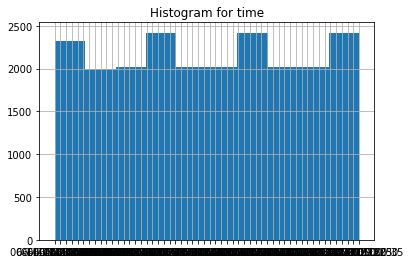

In [ ]:
plt.title('Histogram for time')
data['time'].hist()

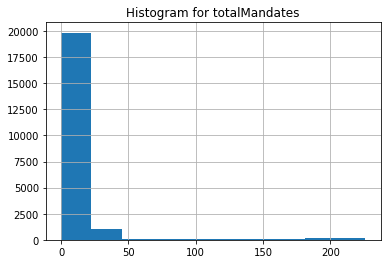

In [ ]:
plt.title('Histogram for totalMandates')
data['totalMandates'].hist()

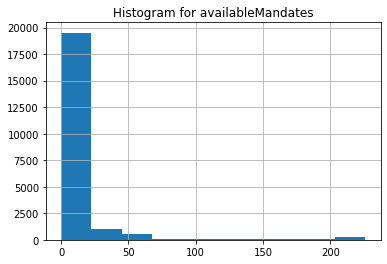

In [ ]:
plt.title('Histogram for availableMandates')
data['availableMandates'].hist()

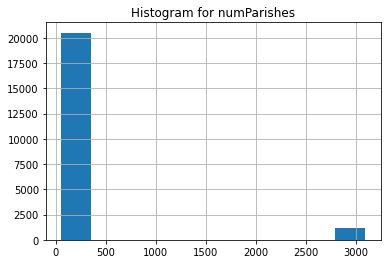

In [ ]:
plt.title('Histogram for numParishes')
data['numParishes'].hist()

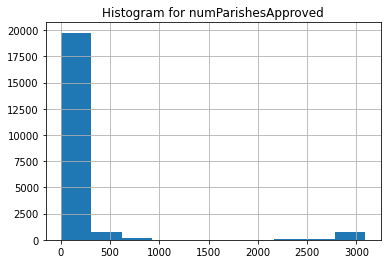

In [ ]:
plt.title('Histogram for numParishesApproved')
data['numParishesApproved'].hist()

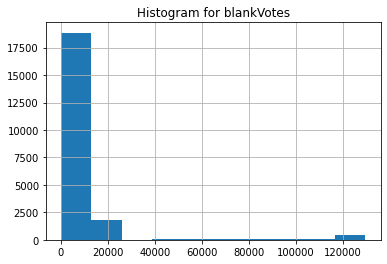

In [ ]:
plt.title('Histogram for blankVotes')
data['blankVotes'].hist()

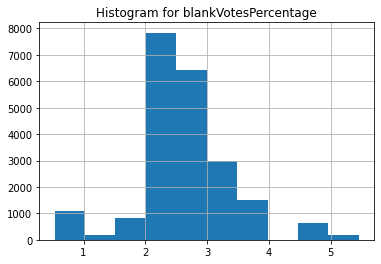

In [ ]:
plt.title('Histogram for blankVotesPercentage')
data['blankVotesPercentage'].hist()

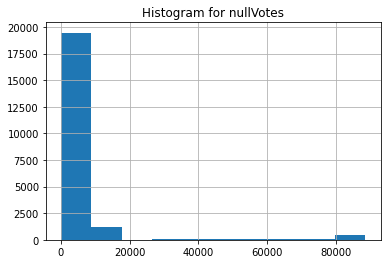

In [ ]:
plt.title('Histogram for nullVotes')
data['nullVotes'].hist()

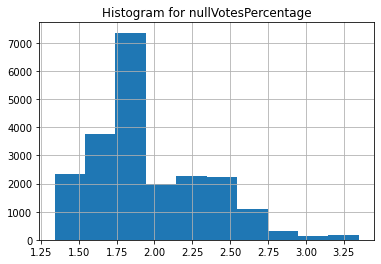

In [ ]:
plt.title('Histogram for nullVotesPercentage')
data['nullVotesPercentage'].hist()

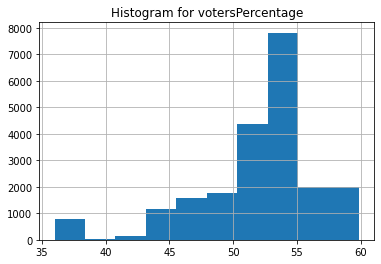

In [ ]:
plt.title('Histogram for votersPercentage')
data['votersPercentage'].hist()

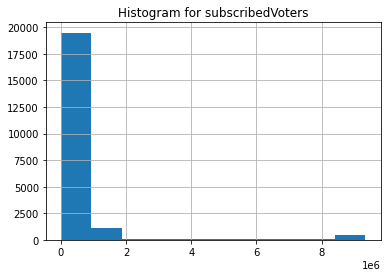

In [ ]:
plt.title('Histogram for subscribedVoters')
data['subscribedVoters'].hist()

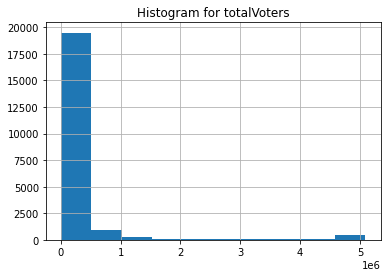

In [ ]:
plt.title('Histogram for totalVoters')
data['totalVoters'].hist()

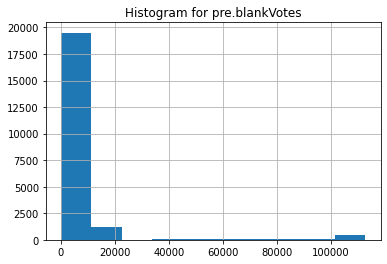

In [ ]:
plt.title('Histogram for pre.blankVotes')
data['pre.blankVotes'].hist()

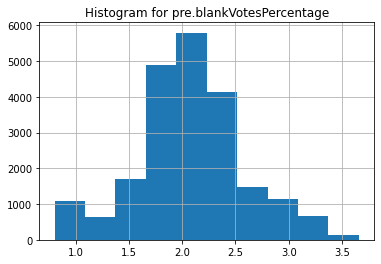

In [ ]:
plt.title('Histogram for pre.blankVotesPercentage')
data['pre.blankVotesPercentage'].hist()

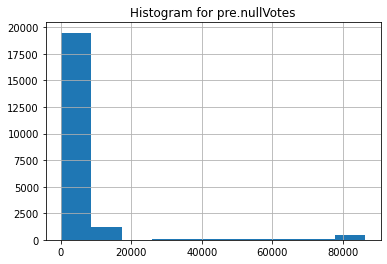

In [ ]:
plt.title('Histogram for pre.nullVotes')
data['pre.nullVotes'].hist()

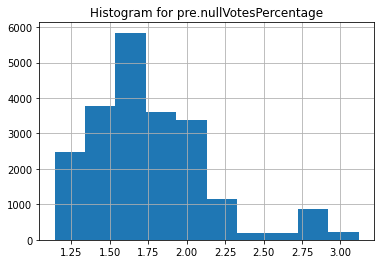

In [ ]:
plt.title('Histogram for pre.nullVotesPercentage')
data['pre.nullVotesPercentage'].hist()

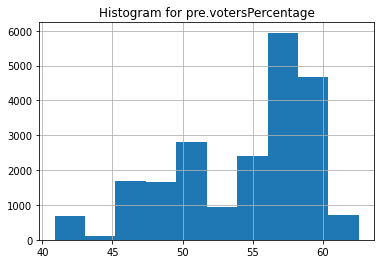

In [ ]:
plt.title('Histogram for pre.votersPercentage')
data['pre.votersPercentage'].hist()

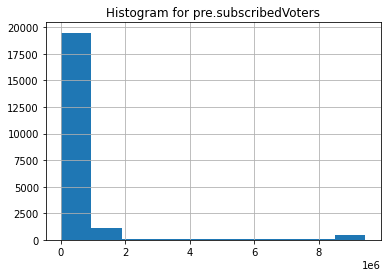

In [ ]:
plt.title('Histogram for pre.subscribedVoters')
data['pre.subscribedVoters'].hist()

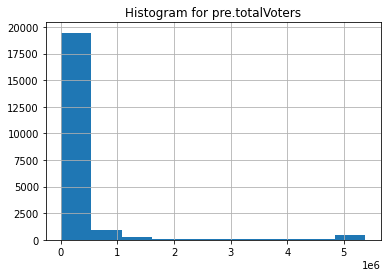

In [ ]:
plt.title('Histogram for pre.totalVoters')
data['pre.totalVoters'].hist()

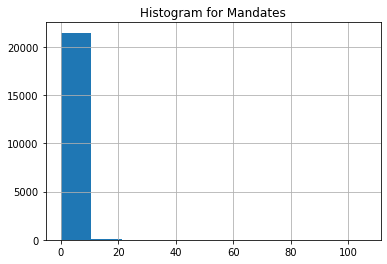

In [ ]:
plt.title('Histogram for Mandates')
data['Mandates'].hist()

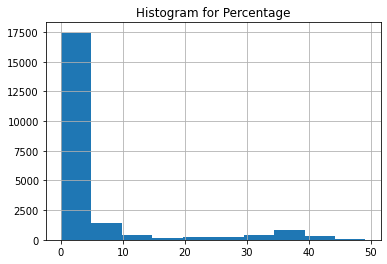

In [ ]:
plt.title('Histogram for Percentage')
data['Percentage'].hist()

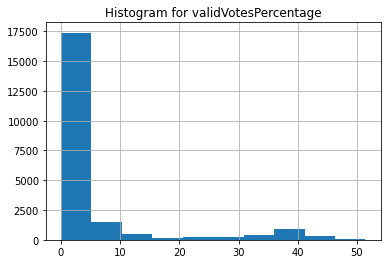

In [ ]:
plt.title('Histogram for validVotesPercentage')
data['validVotesPercentage'].hist()

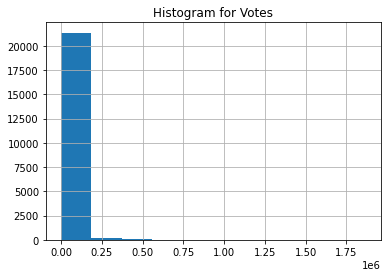

In [ ]:
plt.title('Histogram for Votes')
data['Votes'].hist()

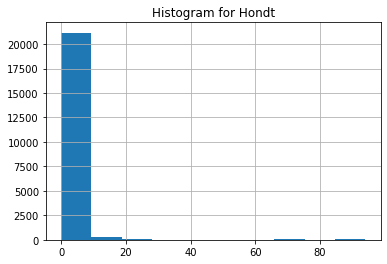

In [ ]:
plt.title('Histogram for Hondt')
data['Hondt'].hist()

The above histograms shows the variation and distribution of data based on the features present in the dataset.

## 2.Bivariate Analysis

2.1 HEATMAP

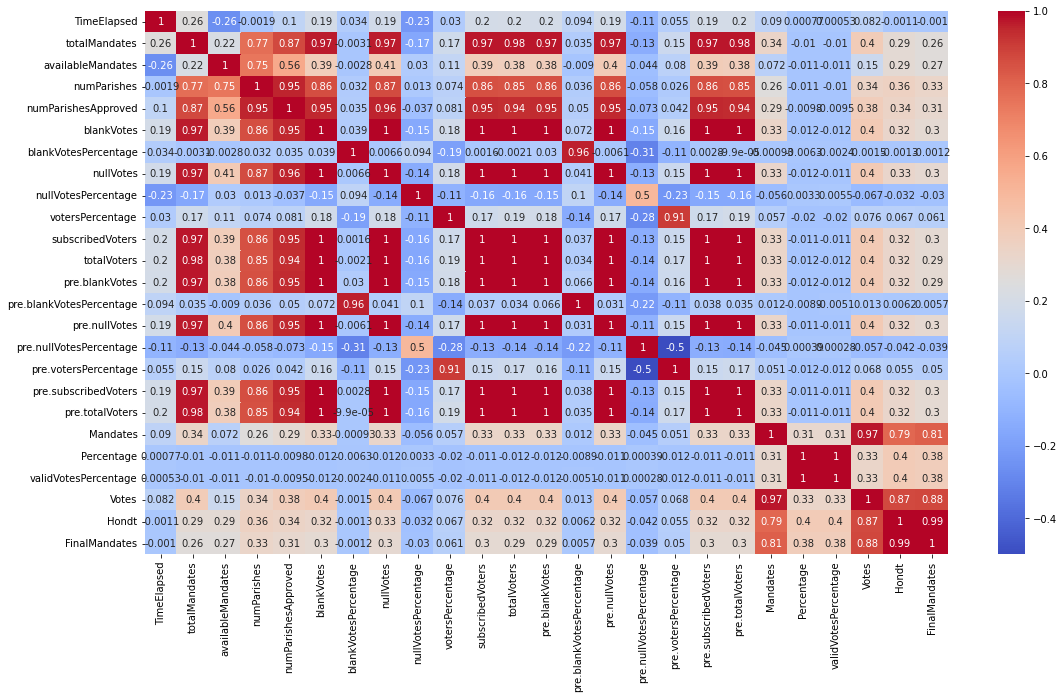

In [ ]:
#get correlations of numerical features in dataset
plt.figure(figsize=(18,10))
#plot heat map
sns.heatmap(data.corr(),cmap='coolwarm',annot=True)

**Observations:
a. Clearly some factors are very highly correlated >0.9 .
b. These high corelating factors can be combined later to decrease dimensionality of the model.**

**Features like - 'totalMandates','numParishesApproved','blankVotes','nullVotes','subscribedVoters','totalVoters','pre.blankVotes','pre.nullVotes','pre.subscribedVoters','pre.totalVoters','Percentage','Mandates','pre.blankVotesPercentage','pre.votersPercentage' are highly correlated (>.90).We will handle these features in preprocessing stage.**

2.2 SCATTERPLOT

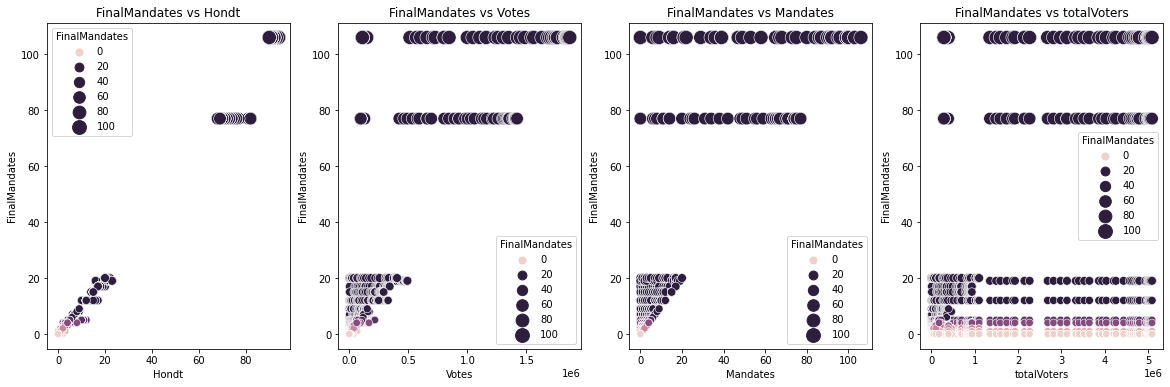

In [ ]:
#Plotting different variables against target variable-Final mandate to find the best correlation
cols=["Hondt","Votes","Mandates","totalVoters"]

fig, axes = plt.subplots(nrows=1,ncols=4,figsize=[20,6])
for i in range(0,len(cols)):
    axes[i]=sns.scatterplot( x= cols[i], y="FinalMandates", data = data,hue="FinalMandates", size = "FinalMandates",    sizes=(50,200), hue_norm=(0, 6),cmap="accent",ax=axes[i])
    axes[i].set_title("FinalMandates vs "+cols[i])

**Observations:
a. Hondt - This seems to be linearly correlated with the target variable but also shows some outliers .
b. Votes - This value is also discrete and positively corelated with the FinalMandates.
c. Mandates - This variable shows discrete relationship with the target variables.
d. toal Voters - This variable show negligible correlation with the Target variables**

# **PREPROCESSING**

## **1.MISSING VALUE**

In [ ]:
#First lets check if there any missing values in our dataset using isna().sum()

In [ ]:
data.isna().sum()

TimeElapsed                  0
time                         0
territoryName                0
totalMandates                0
availableMandates            0
numParishes                  0
numParishesApproved          0
blankVotes                   0
blankVotesPercentage         0
nullVotes                    0
nullVotesPercentage          0
votersPercentage             0
subscribedVoters             0
totalVoters                  0
pre.blankVotes               0
pre.blankVotesPercentage     0
pre.nullVotes                0
pre.nullVotesPercentage      0
pre.votersPercentage        14
pre.subscribedVoters         0
pre.totalVoters             20
Party                        0
Mandates                     0
Percentage                   0
validVotesPercentage        42
Votes                        8
Hondt                        0
FinalMandates                0
dtype: int64

This dataset contains some missing values: pre.votersPercentage (14), pre.totalVoters (20), validVotesPercentage(42) and Votes (8). We need to handle these missing values.

In [ ]:
#pre.votersPercentage

First we will check the skewness of the data then we will decide which method should be used for replacing the missing values in pre.votersPercentage .

In [ ]:
#Plotting distplot for pre.votersPercentage

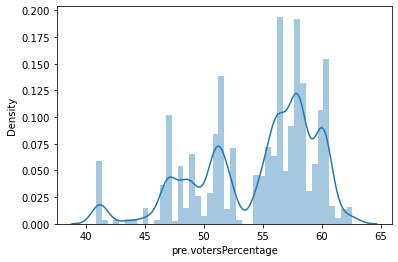

In [ ]:
sns.distplot(data['pre.votersPercentage'])

In [ ]:
print('skewness value of pre.votersPercentage: ',data['pre.votersPercentage'].skew())

skewness value of pre.votersPercentage:  -0.7794645971367441


The skewness is -.77 which is between -.5 and -1 so it is moderately skewed so we can use mean() for replacing the missing value

In [ ]:
data['pre.votersPercentage'].fillna(data['pre.votersPercentage'].mean(),inplace=True)

In [ ]:
#pre.totalVoters

We will check the skewness of pre.subscribedVoters  then we will decide which method should be used for replacing the missing values

In [ ]:
#Plotting distplt for pre.totalVoters

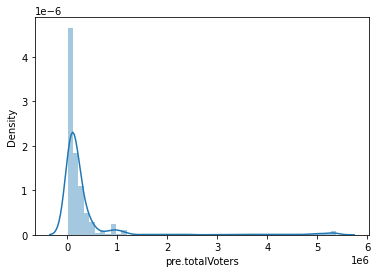

In [ ]:
sns.distplot(data['pre.totalVoters'])

In [ ]:
print('skewness value of pre.totalVoters: ',data['pre.totalVoters'].skew())

skewness value of pre.totalVoters:  4.54585062271886


The skewness of the data 4.54 which is highly skewed value so we will use median() for replacing the missing value

In [ ]:
data['pre.totalVoters'].fillna(data['pre.totalVoters'].median(),inplace=True)

In [ ]:
#validVotesPercentage

We will check the skewness of validVotesPercentage then we will decide which method should be used for replacing the missing values

In [ ]:
#Plotting distplot for validVotesPercentage

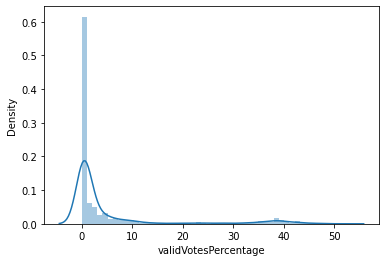

In [ ]:
sns.distplot(data['validVotesPercentage'])

In [ ]:
print('skewness value of validVotesPercentage: ',data['validVotesPercentage'].skew())

skewness value of validVotesPercentage:  2.5436620715062754


The skewness of the data 2.54 which is highly skewed value so we will use median() for replacing the missing value

In [ ]:
data['validVotesPercentage'].fillna(data['validVotesPercentage'].median(),inplace=True)

In [ ]:
#Votes    

We will check the skewness of Votes  then we will decide which method should be used for replacing the missing values

In [ ]:
#Plotting distplt for Votes

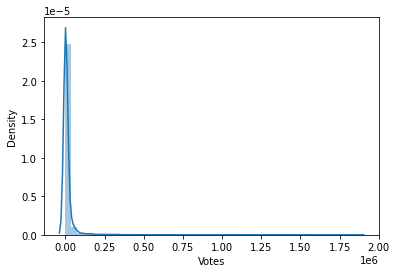

In [ ]:
sns.distplot(data['Votes'])

In [ ]:
print('skewness value of Votes: ',data['Votes'].skew())

skewness value of Votes:  13.937999260953822


The skewness of the data 13.93 which is highly skewed value so we will use median() for replacing the missing value

In [ ]:
data['Votes'].fillna(data['Votes'].median(),inplace=True)

In [ ]:
#We gonna check missing values again using isna().sum()

In [ ]:
data.isna().sum()

TimeElapsed                 0
time                        0
territoryName               0
totalMandates               0
availableMandates           0
numParishes                 0
numParishesApproved         0
blankVotes                  0
blankVotesPercentage        0
nullVotes                   0
nullVotesPercentage         0
votersPercentage            0
subscribedVoters            0
totalVoters                 0
pre.blankVotes              0
pre.blankVotesPercentage    0
pre.nullVotes               0
pre.nullVotesPercentage     0
pre.votersPercentage        0
pre.subscribedVoters        0
pre.totalVoters             0
Party                       0
Mandates                    0
Percentage                  0
validVotesPercentage        0
Votes                       0
Hondt                       0
FinalMandates               0
dtype: int64

 **We handled all missing values**

### **2. FEATURE REDUCTION**

**From Fig 2.2 HEATMAP we can observe that some factore are 'totalMandates','numParishesApproved','blankVotes','nullVotes', 'subscribedVoters','totalVoters','pre.blankVotes','pre.nullVotes', 'pre.subscribedVoters','pre.totalVoters','Percentage','Mandates','pre.blankVotesPercentage','pre.votersPercentage' are highly correlated (>.90).So we will handle these feature now**


In [ ]:
# Dropping columns from correlation heatmap with ultiple observations of high correlation coefficients(>0.90) to avoid multicollinearity
data=data.drop(['totalMandates','numParishesApproved','blankVotes','nullVotes','subscribedVoters','totalVoters','pre.blankVotes','pre.nullVotes','pre.subscribedVoters','pre.totalVoters','Percentage','Mandates','pre.blankVotesPercentage','pre.votersPercentage'],axis=1)

In [ ]:
data.columns

Index(['TimeElapsed', 'time', 'territoryName', 'availableMandates',
       'numParishes', 'blankVotesPercentage', 'nullVotesPercentage',
       'votersPercentage', 'pre.nullVotesPercentage', 'Party',
       'validVotesPercentage', 'Votes', 'Hondt', 'FinalMandates'],
      dtype='object')

In [ ]:
data.head()

,TimeElapsed,time,territoryName,availableMandates,numParishes,blankVotesPercentage,nullVotesPercentage,votersPercentage,pre.nullVotesPercentage,Party,validVotesPercentage,Votes,Hondt,FinalMandates
0,0,06-10-2019 20:10,Território Nacional,226,3092,2.5,2.3,51.36,1.91,PS,40.22,147993.0,94,106
1,0,06-10-2019 20:10,Território Nacional,226,3092,2.5,2.3,51.36,1.91,PPD/PSD,34.95,128624.0,81,77
2,0,06-10-2019 20:10,Território Nacional,226,3092,2.5,2.3,51.36,1.91,B.E.,7.15,26307.0,16,19
3,0,06-10-2019 20:10,Território Nacional,226,3092,2.5,2.3,51.36,1.91,CDS-PP,5.14,18923.0,12,5
4,0,06-10-2019 20:10,Território Nacional,226,3092,2.5,2.3,51.36,1.91,PCP-PEV,4.83,17757.0,11,12


**The above table shows the features after dropping the high correlated features**


### **3. OUTLIER DETECTION**

In [ ]:
#Now we will check for outliers using boxplot

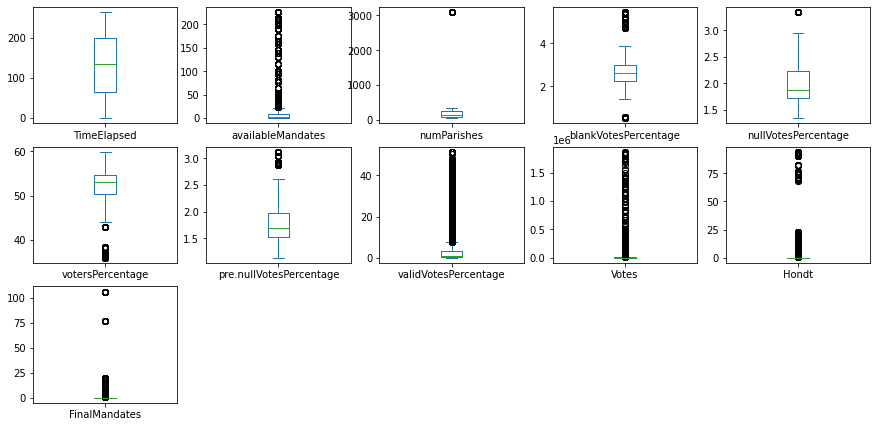

In [ ]:
data.plot(kind="box",subplots=True,layout=(6,5),figsize=(15,15))
plt.show()

We can clearly see that outliers are present in our data we need to handle them before creating our models

**1. availableMandates**  

In [ ]:
#Lets check the skewness
print('skewness value of availableMandates: ',data['availableMandates'].skew())

skewness value of availableMandates:  5.131572086135508


In [ ]:
#Using IQR method for handling the outlier
Q1=np.percentile(data['availableMandates'],25,interpolation='midpoint')
Q3=np.percentile(data['availableMandates'],75,interpolation='midpoint')

In [ ]:
IQR=Q3-Q1
print(IQR)

9.0


In [ ]:
low=Q1-1.5*IQR
up=Q3+1.5*IQR
print('low =',low)
print('up =',up)

low = -13.5
up = 22.5


In [ ]:
#Data points below and above the limits are considered as outliers
outlier = []
for x in data['availableMandates']:
    if ((x > up) or (x < low)):
        outlier.append(x)

In [ ]:
len(outlier)

2129

In [ ]:
#Replacing outliers using median
data.loc[((data['availableMandates'] > up) | (data['availableMandates'] < low)),'availableMandates'] =data['availableMandates'].median()

In [ ]:
print('skewness value of availableMandates: ',data['availableMandates'].skew())

skewness value of availableMandates:  1.546612174581621




We can see that the skewness is reduced to 1.54 from 5.13 after replacing the outlier value with the median value.

**2. numParishes**

In [ ]:
#Lets check the skewness
print('skewness value of numParishes: ',data['numParishes'].skew())

skewness value of numParishes:  3.920432521474575


In [ ]:
#Using IQR method for handling the outlier
Q1=np.percentile(data['numParishes'],25,interpolation='midpoint')
Q3=np.percentile(data['numParishes'],75,interpolation='midpoint')

In [ ]:
IQR=Q3-Q1
print(IQR)

167.0


In [ ]:
low=Q1-1.5*IQR
up=Q3+1.5*IQR
print('low=',low)
print('up=',up)

low= -175.5
up= 492.5


In [ ]:
#Data points below and above the limits are considered as outliers
outlier = []
for x in data['numParishes']:
    if ((x > up) or (x < low)):
        outlier.append(x)

In [ ]:
len(outlier)

1134

In [ ]:
#Replacing outliers using median
data.loc[((data['numParishes'] > up) | (data['numParishes'] < low)),'numParishes'] =data['numParishes'].median()

In [ ]:
print('skewness value of numParishes: ',data['numParishes'].skew())

skewness value of numParishes:  0.6322413031387463


We can see that the skewness is reduced to 0 from 3.92 after replacing the outlier value with the median value.

 **3.  votersPercentage**

In [ ]:
#Lets check the skewness
print('skewness value of  votersPercentage: ',data['votersPercentage'].skew())

skewness value of  votersPercentage:  -1.1580286822972536


In [ ]:
#Using IQR method for handling the outlier
Q1=np.percentile(data['votersPercentage'],25,interpolation='midpoint')
Q3=np.percentile(data['votersPercentage'],75,interpolation='midpoint')

In [ ]:
IQR=Q3-Q1
print(IQR)

4.259999999999998


In [ ]:
low=Q1-1.5*IQR
up=Q3+1.5*IQR
print('low =',low)
print('up =',up)

low = 43.900000000000006
up = 60.94


In [ ]:
#Data points below and above the limits are considered as outliers
outlier = []
for x in data['votersPercentage']:
    if ((x > up) or (x < low)):
        outlier.append(x)

In [ ]:
len(outlier)

959

In [ ]:
#Replacing outliers using median
data.loc[((data['votersPercentage'] > up) | (data['votersPercentage'] < low)),'votersPercentage'] =data['votersPercentage'].median()

In [ ]:
print('skewness value of votersPercentage: ',data['votersPercentage'].skew())

skewness value of votersPercentage:  -0.40994244729317525


We can see that the skewness is reduced to -.40 from -1.15 after replacing the outlier value with the median value.

**4. pre.nullVotesPercentage**

In [ ]:
#Lets check the skewness
print('skewness value of pre.nullVotesPercentage: ',data['pre.nullVotesPercentage'].skew())

skewness value of pre.nullVotesPercentage:  1.23110874681553


In [ ]:
#Using IQR method for handling the outlier
Q1=np.percentile(data['pre.nullVotesPercentage'],25,interpolation='midpoint')
Q3=np.percentile(data['pre.nullVotesPercentage'],75,interpolation='midpoint')

In [ ]:
IQR=Q3-Q1
print(IQR)

0.44999999999999996


In [ ]:
low=Q1-1.5*IQR
up=Q3+1.5*IQR
print('low =',low)
print('up =',up)

low = 0.8450000000000001
up = 2.645


In [ ]:
#Data points below and above the limits are considered as outliers
outlier = []
for x in data['pre.nullVotesPercentage']:
    if ((x > up) or (x < low)):
        outlier.append(x)

In [ ]:
len(outlier)

1080

In [ ]:
#Replacing outliers using median
data.loc[((data['pre.nullVotesPercentage'] > up) | (data['pre.nullVotesPercentage'] < low)),'pre.nullVotesPercentage'] =data['pre.nullVotesPercentage'].median()

In [ ]:
print('skewness value of pre.nullVotesPercentage: ',data['pre.nullVotesPercentage'].skew())

skewness value of pre.nullVotesPercentage:  0.4610752513626559


:We can see that the skewness is reduced to .46 from 1.23 after replacing the outlier value with the median value.

**5. validVotesPercentage**

In [ ]:
#Lets check the skewness
print('skewness value of validVotesPercentage: ',data['validVotesPercentage'].skew())

skewness value of validVotesPercentage:  2.5471313880393347


In [ ]:
#Using IQR method for handling the outlier
Q1=np.percentile(data['validVotesPercentage'],25,interpolation='midpoint')
Q3=np.percentile(data['validVotesPercentage'],75,interpolation='midpoint')

In [ ]:
IQR=Q3-Q1
print(IQR)

2.93


In [ ]:
low=Q1-1.5*IQR
up=Q3+1.5*IQR
print('low =',low)
print('up =',up)

low = -4.165
up = 7.555000000000001


In [ ]:
#Data points below and above the limits are considered as outliers
outlier = []
for x in data['validVotesPercentage']:
    if ((x > up) or (x < low)):
        outlier.append(x)

In [ ]:
len(outlier)

3427

In [ ]:
#Replacing outliers using median
data.loc[((data['validVotesPercentage'] > up) | (data['validVotesPercentage'] < low)),'validVotesPercentage'] =data['validVotesPercentage'].median()

In [ ]:
print('skewness value of validVotesPercentage: ',data['validVotesPercentage'].skew())

skewness value of validVotesPercentage:  2.446060075192508


We can see that the skewness is reduced to 2.44 from 2.54 after replacing the outlier value with the median value.

**6. Votes**

In [ ]:
#Lets check the skewness
print('skewness value of Votes : ',data['Votes'].skew())

skewness value of Votes :  13.940551155305446


In [ ]:
#Using IQR method for handling the outlier
Q1=np.percentile(data['Votes'],25,interpolation='midpoint')
Q3=np.percentile(data['Votes'],75,interpolation='midpoint')

In [ ]:
IQR=Q3-Q1
print(IQR)

4274.0


In [ ]:
low=Q1-1.5*IQR
up=Q3+1.5*IQR
print('low =',low)
print('up =',up)

low = -6175.0
up = 10921.0


In [ ]:
#Data points below and above the limits are considered as outliers
outlier = []
for x in data['Votes']:
    if ((x > up) or (x < low)):
        outlier.append(x)

In [ ]:
len(outlier)

3564

In [ ]:
#Replacing outliers using median
data.loc[((data['Votes'] > up) | (data['Votes'] < low)),'Votes'] =data['Votes'].median()

In [ ]:
print('skewness value of Votes: ',data['Votes'].skew())

skewness value of Votes:  2.5954377321758177


We can see that the skewness is reduced to 2.59 from 13.94

after replacing the outlier value with the median value.


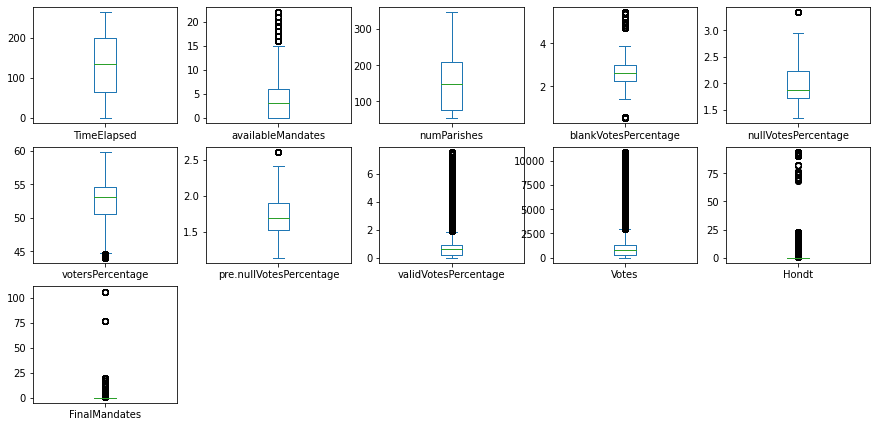

In [ ]:
#Plotting boxplot again to check outliers
data.plot(kind="box",subplots=True,layout=(6,5),figsize=(15,15))
plt.show()

## **4. LABEL ENCODING**

We will use label encoding technique for handling categorical variables in our dataset. In this technique, each label is assigned a unique integer based on alphabetical ordering.


In [ ]:
#Label encoding categorical variables
obj_col =[]
for i in data.columns:
    if data[i].dtypes=="O":
        obj_col.append(i)
obj_col

['time', 'territoryName', 'Party']

We can see we have 3 categorical features time, territoryName and Party we will perform label encoding now

In [ ]:
le = LabelEncoder()
for i in obj_col:
    data[i]=pd.DataFrame(le.fit_transform(data[i]))

In [ ]:
data.head()

,TimeElapsed,time,territoryName,availableMandates,numParishes,blankVotesPercentage,nullVotesPercentage,votersPercentage,pre.nullVotesPercentage,Party,validVotesPercentage,Votes,Hondt,FinalMandates
0,0,0,16,3,147,2.5,2.3,51.36,1.91,17,0.65,790.0,94,106
1,0,0,16,3,147,2.5,2.3,51.36,1.91,15,0.65,790.0,81,77
2,0,0,16,3,147,2.5,2.3,51.36,1.91,1,7.15,790.0,16,19
3,0,0,16,3,147,2.5,2.3,51.36,1.91,2,5.14,790.0,12,5
4,0,0,16,3,147,2.5,2.3,51.36,1.91,11,4.83,790.0,11,12


##**5. STANDARDIZATION**

In [ ]:
# dropping Final Mandate variable from X 
#assign the value of y for training
x = data.drop(columns=['FinalMandates'])
y = data[["FinalMandates"]]

In [ ]:
#Standardizing value of x by using standardscalar to make the data normally distributed
sc = StandardScaler()
a = sc.fit_transform(x)
data_x = pd.DataFrame(a,columns=x.columns)
data_x.head()

,TimeElapsed,time,territoryName,availableMandates,numParishes,blankVotesPercentage,nullVotesPercentage,votersPercentage,pre.nullVotesPercentage,Party,validVotesPercentage,Votes,Hondt
0,-1.714708,-1.714708,0.982968,-0.163684,-0.108258,-0.152941,0.902163,-0.352343,0.679978,1.126269,-0.280928,-0.287911,14.757327
1,-1.714708,-1.714708,0.982968,-0.163684,-0.108258,-0.152941,0.902163,-0.352343,0.679978,0.799979,-0.280928,-0.287911,12.691673
2,-1.714708,-1.714708,0.982968,-0.163684,-0.108258,-0.152941,0.902163,-0.352343,0.679978,-1.484053,4.288351,-0.287911,2.363404
3,-1.714708,-1.714708,0.982968,-0.163684,-0.108258,-0.152941,0.902163,-0.352343,0.679978,-1.320908,2.875389,-0.287911,1.727818
4,-1.714708,-1.714708,0.982968,-0.163684,-0.108258,-0.152941,0.902163,-0.352343,0.679978,0.147398,2.657470,-0.287911,1.568922


In [ ]:
data_x.tail()

,TimeElapsed,time,territoryName,availableMandates,numParishes,blankVotesPercentage,nullVotesPercentage,votersPercentage,pre.nullVotesPercentage,Party,validVotesPercentage,Votes,Hondt
21638,1.698068,1.698068,1.484214,-0.764569,1.518612,0.236864,0.315874,-0.43846,0.644966,-0.178892,-0.597262,-0.503578,-0.178939
21639,1.698068,1.698068,1.484214,-0.764569,1.518612,0.236864,0.315874,-0.43846,0.644966,0.636834,-0.604292,-0.506404,-0.178939
21640,1.698068,1.698068,1.484214,-0.764569,1.518612,0.236864,0.315874,-0.43846,0.644966,-0.342037,-0.632410,-0.539366,-0.178939
21641,1.698068,1.698068,1.484214,-0.764569,1.518612,0.236864,0.315874,-0.43846,0.644966,1.289414,-0.639440,-0.547371,-0.178939
21642,1.698068,1.698068,1.484214,-0.764569,1.518612,0.236864,0.315874,-0.43846,0.644966,-0.831473,-0.688648,-0.604349,-0.178939


### **6. FEATURE ENGINEERING**

In feature Engineering we create new features from the existing features from our dataset

In [ ]:
#We have the following columns in our dataset to perform feature engineering
data_x.columns

Index(['TimeElapsed', 'time', 'territoryName', 'availableMandates',
       'numParishes', 'blankVotesPercentage', 'nullVotesPercentage',
       'votersPercentage', 'pre.nullVotesPercentage', 'Party',
       'validVotesPercentage', 'Votes', 'Hondt'],
      dtype='object')

Here 'blankVotesPercentage' and 'nullVotesPercentage' both represents votes percentage of invalid votes so we created a new feature by combining the above two features.

In [ ]:
data_x.head()

,TimeElapsed,time,territoryName,availableMandates,numParishes,blankVotesPercentage,nullVotesPercentage,votersPercentage,pre.nullVotesPercentage,Party,validVotesPercentage,Votes,Hondt
0,-1.714708,-1.714708,0.982968,-0.163684,-0.108258,-0.152941,0.902163,-0.352343,0.679978,1.126269,-0.280928,-0.287911,14.757327
1,-1.714708,-1.714708,0.982968,-0.163684,-0.108258,-0.152941,0.902163,-0.352343,0.679978,0.799979,-0.280928,-0.287911,12.691673
2,-1.714708,-1.714708,0.982968,-0.163684,-0.108258,-0.152941,0.902163,-0.352343,0.679978,-1.484053,4.288351,-0.287911,2.363404
3,-1.714708,-1.714708,0.982968,-0.163684,-0.108258,-0.152941,0.902163,-0.352343,0.679978,-1.320908,2.875389,-0.287911,1.727818
4,-1.714708,-1.714708,0.982968,-0.163684,-0.108258,-0.152941,0.902163,-0.352343,0.679978,0.147398,2.657470,-0.287911,1.568922


In [ ]:
#Creating new feature invalidVotersPercentage
data_x['invalidVotesPercentage']=(data_x['blankVotesPercentage']+data_x['nullVotesPercentage'])*.5

In [ ]:
#Droping existing features 'blankVotesPercentage','nullVotesPercentage'
data_x=data_x.drop(['blankVotesPercentage','nullVotesPercentage'],axis=1)

In [ ]:
#Displaying dataset
data_x.head()

,TimeElapsed,time,territoryName,availableMandates,numParishes,votersPercentage,pre.nullVotesPercentage,Party,validVotesPercentage,Votes,Hondt,invalidVotesPercentage
0,-1.714708,-1.714708,0.982968,-0.163684,-0.108258,-0.352343,0.679978,1.126269,-0.280928,-0.287911,14.757327,0.374611
1,-1.714708,-1.714708,0.982968,-0.163684,-0.108258,-0.352343,0.679978,0.799979,-0.280928,-0.287911,12.691673,0.374611
2,-1.714708,-1.714708,0.982968,-0.163684,-0.108258,-0.352343,0.679978,-1.484053,4.288351,-0.287911,2.363404,0.374611
3,-1.714708,-1.714708,0.982968,-0.163684,-0.108258,-0.352343,0.679978,-1.320908,2.875389,-0.287911,1.727818,0.374611
4,-1.714708,-1.714708,0.982968,-0.163684,-0.108258,-0.352343,0.679978,0.147398,2.657470,-0.287911,1.568922,0.374611


In [ ]:
#Dispalying columns
data_x.columns

Index(['TimeElapsed', 'time', 'territoryName', 'availableMandates',
       'numParishes', 'votersPercentage', 'pre.nullVotesPercentage', 'Party',
       'validVotesPercentage', 'Votes', 'Hondt', 'invalidVotesPercentage'],
      dtype='object')

We can see a new feature invalidVotesPercentage is created in the dataset.

## **MODELING**

In [ ]:
#Taking x and y values
x=data_x
y= data[["FinalMandates"]]

In [ ]:
#Splitting data into train and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=45)

### **1. LINEAR REGRESSOR**

In [ ]:
model=LinearRegression()
model.fit(x_train,y_train)
score=model.score(x_train,y_train)
predm=model.predict(x_test)
print('Score of',model,'is:',score)
print('MAE:',mean_absolute_error(y_test,predm))
print('MSE:',mean_squared_error(y_test,predm))
print('RMSE:',np.sqrt(mean_squared_error(y_test,predm)))
print('R2 score:',r2_score(y_test,predm))
print('*'*100)
print('\n')     

Score of LinearRegression() is: 0.989677680128438
MAE: 0.2310855232434587
MSE: 0.5386707471342136
RMSE: 0.7339419235431462
R2 score: 0.986814786226216
****************************************************************************************************




### **2. SVR**

In [ ]:
model=SVR()
model.fit(x_train,y_train)
score=model.score(x_train,y_train)
predm=model.predict(x_test)
print('Score of',model,'is:',score)
print('MAE:',mean_absolute_error(y_test,predm))
print('MSE:',mean_squared_error(y_test,predm))
print('RMSE:',np.sqrt(mean_squared_error(y_test,predm)))
print('R2 score:',r2_score(y_test,predm))
print('*'*100)
print('\n')  

Score of SVR() is: 0.7711532247316282
MAE: 0.2934381950341629
MSE: 9.225077019397016
RMSE: 3.0372811887273485
R2 score: 0.7741948802167535
****************************************************************************************************




### **3. DECISION TREE REGRESSOR**

In [ ]:
model=DecisionTreeRegressor()
model.fit(x_train,y_train)
score=model.score(x_train,y_train)
predm=model.predict(x_test)
print('Score of',model,'is:',score)
print('MAE:',mean_absolute_error(y_test,predm))
print('MSE:',mean_squared_error(y_test,predm))
print('RMSE:',np.sqrt(mean_squared_error(y_test,predm)))
print('R2 score:',r2_score(y_test,predm))
print('*'*100)
print('\n')  

Score of DecisionTreeRegressor() is: 1.0
MAE: 0.001848001848001848
MSE: 0.001848001848001848
RMSE: 0.042988392014610737
R2 score: 0.9999547658759086
****************************************************************************************************




### **4. KNEIGHBORS REGRESSOR**

In [ ]:
model=KNeighborsRegressor()
model.fit(x_train,y_train)
score=model.score(x_train,y_train)
predm=model.predict(x_test)
print('Score of',model,'is:',score)
print('MAE:',mean_absolute_error(y_test,predm))
print('MSE:',mean_squared_error(y_test,predm))
print('RMSE:',np.sqrt(mean_squared_error(y_test,predm)))
print('R2 score:',r2_score(y_test,predm))
print('*'*100)
print('\n')  

Score of KNeighborsRegressor() is: 0.999612913941671
MAE: 0.025040425040425043
MSE: 0.02476322476322476
RMSE: 0.1573633526689895
R2 score: 0.9993938627371758
****************************************************************************************************




### **5. RANDOM FOREST REGRESSOR**

In [ ]:
model=RandomForestRegressor()
model.fit(x_train,y_train)
score=model.score(x_train,y_train)
predm=model.predict(x_test)
print('Score of',model,'is:',score)
print('MAE:',mean_absolute_error(y_test,predm))
print('MSE:',mean_squared_error(y_test,predm))
print('RMSE:',np.sqrt(mean_squared_error(y_test,predm)))
print('R2 score:',r2_score(y_test,predm))
print('*'*100)
print('\n') 

Score of RandomForestRegressor() is: 0.9999966745143338
MAE: 0.0026541926541926546
MSE: 0.0012787479787479787
RMSE: 0.035759585830207524
R2 score: 0.9999686996824084
****************************************************************************************************




### **CROSS VALIDATION**

In [ ]:
def get_score(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    return model.score(x_test, y_test)

In [ ]:
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=5)

scores_linear=[]
scores_svr=[]
scores_rf=[]
scores_dct=[]
scores_knn=[]

for train_index, test_index in folds.split(x,y):
    x_train, x_test, y_train, y_test = x.iloc[train_index], x.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    scores_linear.append(get_score(LinearRegression(), x_train, x_test, y_train, y_test))  
    scores_svr.append(get_score(SVR(), x_train, x_test, y_train, y_test))
    scores_rf.append(get_score(RandomForestRegressor(), x_train, x_test, y_train, y_test))
    scores_dct.append(get_score(DecisionTreeRegressor(), x_train, x_test, y_train, y_test))
    scores_knn.append(get_score(KNeighborsRegressor(), x_train, x_test, y_train, y_test))

In [ ]:
print(np.array(scores_linear).mean())
print(np.array(scores_svr).mean())
print(np.array(scores_rf).mean())
print(np.array(scores_dct).mean())
print(np.array(scores_knn).mean())

0.9884387694924197
0.7041869266224021
0.9953869427351645
0.9946739299601053
0.995033065203773


 **Observations**:

a. After performing cross validation in all five models ,Random Forest Regressor shows the best output.

b. Random Forest Regressor have extremely low error and high R2 score.

c. Now we will tune Random Forest Regressor to get the best results.

## **FINE TUNING**

**RANDOM FOREST REGRESSOR**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rf=RandomForestRegressor()
parameters={'n_estimators':[200,400,500,600] ,'max_depth':[4,5,10,15,20]}
rf_clf = RandomizedSearchCV(estimator = rf,param_distributions =parameters)

In [ ]:
rf_clf.fit(x_train,y_train)
rf_clf.best_params_

{'max_depth': 15, 'n_estimators': 600}

In [ ]:
#Using Random Forest Regressor with its best parameter
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=400,max_features='auto',max_depth=20)
rf.fit(x_train,y_train)
print('Score:',rf.score(x_train,y_train))
y_pred_rf=rf.predict(x_test)
print('Mean absolute error:',mean_absolute_error(y_test,y_pred_rf))
print('Mean squared error:',mean_squared_error(y_test,y_pred_rf))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,y_pred_rf)))
print('R2 score:',r2_score(y_test,y_pred_rf))

Score: 0.9999977013255084
Mean absolute error: 0.00526802218114602
Mean squared error: 0.0029629130083179286
Root Mean Squared Error: 0.054432646530532834
R2 score: 0.9999348693792469


**DECISION TREE REGRESSOR**

### **OVERALL REMARKS**

**a. Taken output variable as Final Mandate**


**b. Understood relationship of FinalMandate by using datavisualization:**


1.   **Votes, Hondt have linear positive relationship.**
2.   **Total Votes, Mandates have discreet values against Target variable.**
3.   **Label Encoded object datas such as Party and territory Name for better EDA analysis.**






**c. Removed outliers using IQR method analysis and converted data into normal distribution**

**d. Checked various regressor models and performed cross validation to avoid over fitting issue and found RandomForest have the  best r2score values>0.99**

**e. Performed finetuning on our final model "Random Forest Regressor" to improve the efficiency of the model by finding the best parameters of these models .**

**f. Final score for RFR model is 0.99999 , RMSE is 0.059 and R2 
score is 0.99992**